In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import ast

In [3]:
with open('cos_sim_matrix_3.json') as f:
    cos_sim_matrix = json.load(f)

In [11]:
cos_sim_matrix.keys()
adjacency_mean, adjacency_std = {}, {}


In [14]:
for key in cos_sim_matrix.keys():
    key_ast = eval(key)
    adjacency_mean[key_ast] = np.mean(cos_sim_matrix[key]['mean'])
    adjacency_std[key_ast] = np.mean(cos_sim_matrix[key]['std'])

/Users/danielmiller/.pyenv/versions/3.10.8/envs/deep_learning_3_10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/danielmiller/.pyenv/versions/3.10.8/envs/deep_learning_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [35]:
adjacency_df = pd.DataFrame.from_dict(adjacency_mean, orient='index', columns=['mean']).reset_index()
adjacency_df['group_1'] = adjacency_df['index'].apply(lambda x: x[0])
adjacency_df['group_2'] = adjacency_df['index'].apply(lambda x: x[1])
adjacency_df.drop(columns=['index'], inplace=True)



In [36]:
adjancey_df_std = pd.DataFrame.from_dict(adjacency_std, orient='index', columns=['std']).reset_index()
adjancey_df_std['group_1'] = adjancey_df_std['index'].apply(lambda x: x[0])
adjancey_df_std['group_2'] = adjancey_df_std['index'].apply(lambda x: x[1])
adjancey_df_std.drop(columns=['index'], inplace=True)

/var/folders/ff/4q6bhhgj28n5wdjn7n8wzcdm0000gn/T/ipykernel_3851/1068873052.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(adjacency_df.pivot('group_1', 'group_2', 'mean'), annot=True, fmt='.4f', cmap='Blues')


<AxesSubplot: xlabel='group_2', ylabel='group_1'>

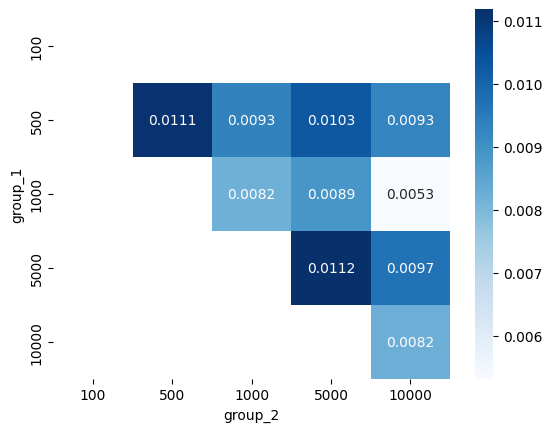

In [43]:
sns.heatmap(adjacency_df.pivot('group_1', 'group_2', 'mean'), annot=True, fmt='.4f', cmap='Blues')

/var/folders/ff/4q6bhhgj28n5wdjn7n8wzcdm0000gn/T/ipykernel_3851/3188848741.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(adjancey_df_std.pivot('group_1', 'group_2', 'std'), annot=True, fmt='.4f', cmap='Blues')


<AxesSubplot: xlabel='group_2', ylabel='group_1'>

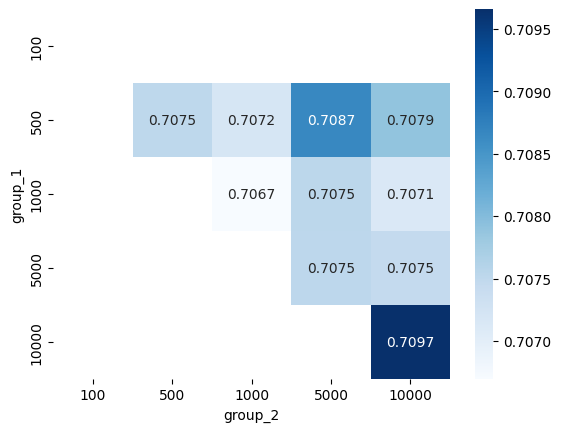

In [44]:
sns.heatmap(adjancey_df_std.pivot('group_1', 'group_2', 'std'), annot=True, fmt='.4f', cmap='Blues')